<a href="https://colab.research.google.com/github/utkarshado/winq_predictwer/blob/main/winequalitypredic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [32]:
winq = pd.read_csv('/content/winq.csv')

In [33]:
winq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
winq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
winq.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


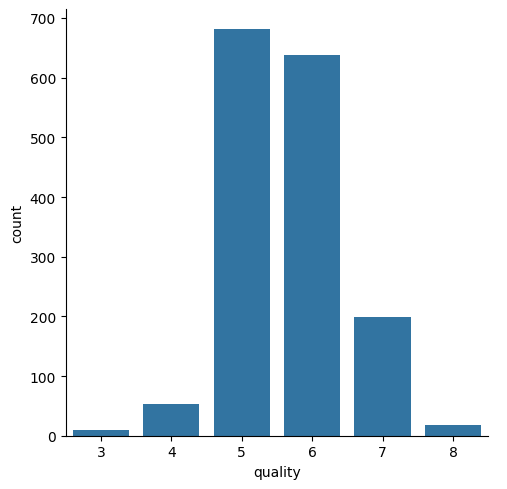

In [36]:
sns.catplot(x='quality',data=winq,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

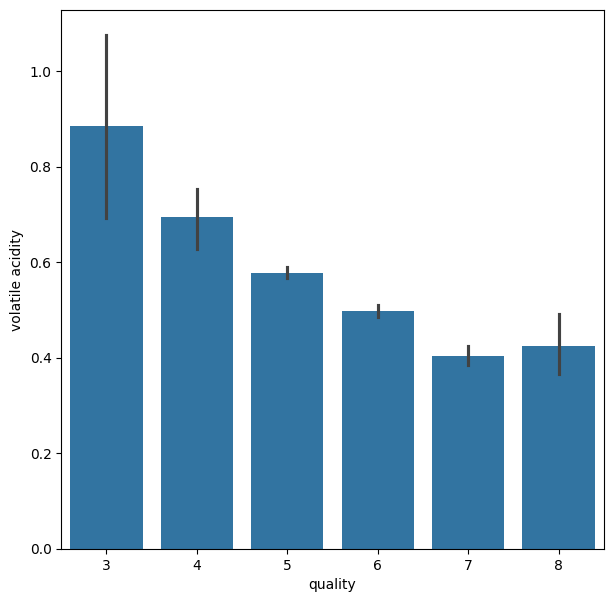

In [37]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='volatile acidity',data=winq)

<Axes: xlabel='quality', ylabel='citric acid'>

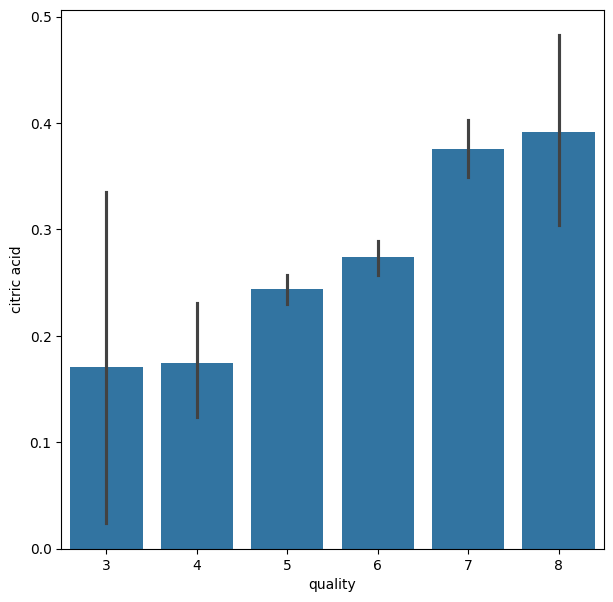

In [38]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='citric acid',data=winq)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

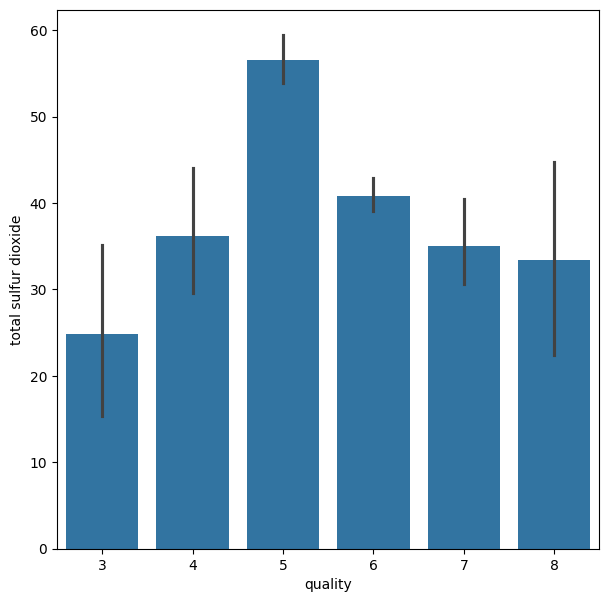

In [39]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='total sulfur dioxide',data=winq)

In [40]:
correl=winq.corr()

<Axes: >

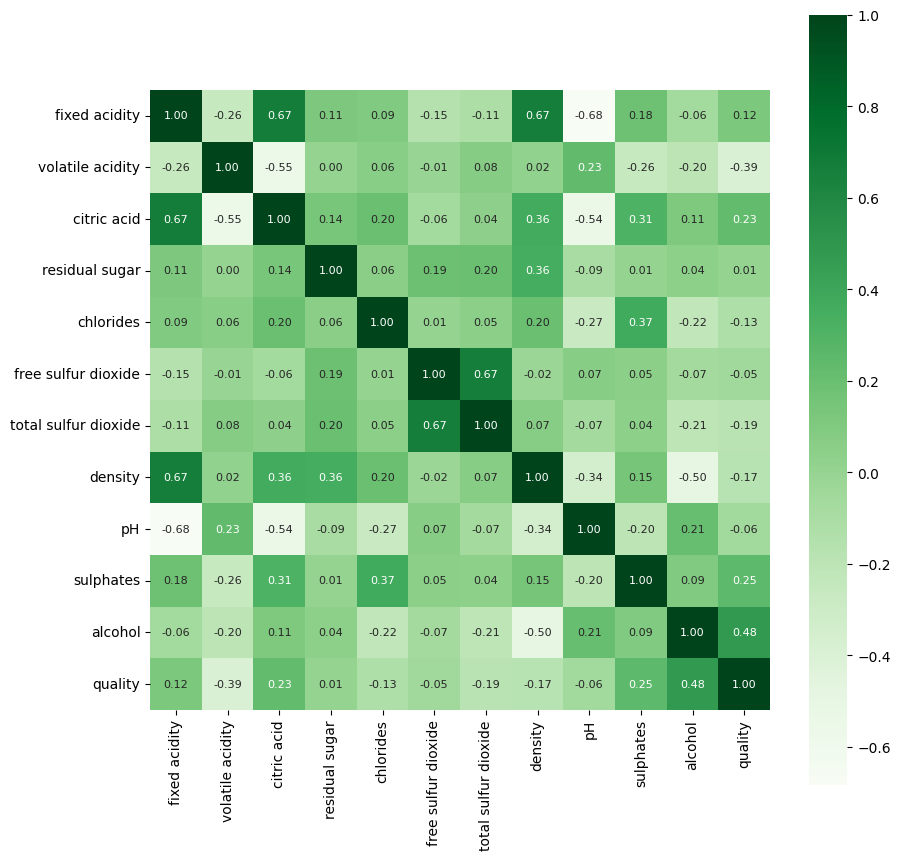

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(correl,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Greens')

In [42]:
z=winq.drop('quality',axis=1)
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [43]:
a=winq['quality'].apply(lambda v:1 if v>=7 else 0)

In [44]:
print(a)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(z,a,test_size=0.2,random_state=72)

In [46]:
m=RandomForestClassifier()
m.fit(xtrain,ytrain)

RandomForestClassifier()

In [47]:
xtestp=m.predict(xtest)
accur=accuracy_score(xtestp,ytest)
print(accur)

0.903125


In [48]:
inp=(7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.2,0.72,13.1)
inparray=np.asarray(inp)
inr=inparray.reshape(1,-1)
pre=m.predict(inr)
if pre==1:
  print('good')
else:
  print('bad')

good


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
